In [26]:
# Cell 1: Setup and data loading for advanced analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

# Enhanced plotting setup
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

In [27]:
# Cell 2: Loading data and creating manageable sample for analysis
# Load the Higgs dataset
df_full = pd.read_csv('../data/raw/higgs.csv')
print(f"Full dataset: {len(df_full):,} events")

# Creating a manageable sample for fast analysis
SAMPLE_SIZE = 100000  # 100k events - perfect for learning!
df = df_full.sample(n=SAMPLE_SIZE, random_state=42)

print(f"Using {len(df):,} event sample for analysis")
print(f"   This preserves all statistical patterns but runs 100x faster!")

# Separate features and target
target_col = df.columns[0]
feature_cols = df.columns[1:]

X = df[feature_cols]  # Physics features
y = df[target_col]    # Signal (1) vs Background (0)

print(f"Analysis-ready dataset:")
print(f"Sample size: {len(df):,}")
print(f"Features: {len(feature_cols)}")
print(f"Signal events: {y.sum():,}")
print(f"Background events: {(len(df) - y.sum()):,}")

Full dataset: 10,999,999 events
Using 100,000 event sample for analysis
   This preserves all statistical patterns but runs 100x faster!
Analysis-ready dataset:
Sample size: 100,000
Features: 28
Signal events: 52,757.0
Background events: 47,243.0


DISCOVERY: Which Features Best Distinguishes Higgs from Background?
Top 10 Most Important Features for Higgs Detection:
-------------------------------------------------------
   1. 7.216574549674987793e-01 | Importance: 0.0508
   2. 8.766783475875854492e-01 | Importance: 0.0221
   3. 9.887509346008300781e-01 | Importance: 0.0181
   4. 9.795631170272827148e-01 | Importance: 0.0147
   5. 1.107436060905456543e+00 | Importance: 0.0088
   6. 9.200048446655273438e-01 | Importance: 0.0082
   7. 3.274700641632080078e-01 | Importance: 0.0068
   8. 8.692932128906250000e-01 | Importance: 0.0064
   9. 0.000000000000000000e+00 | Importance: 0.0051
  10. 0.000000000000000000e+00.1 | Importance: 0.0043


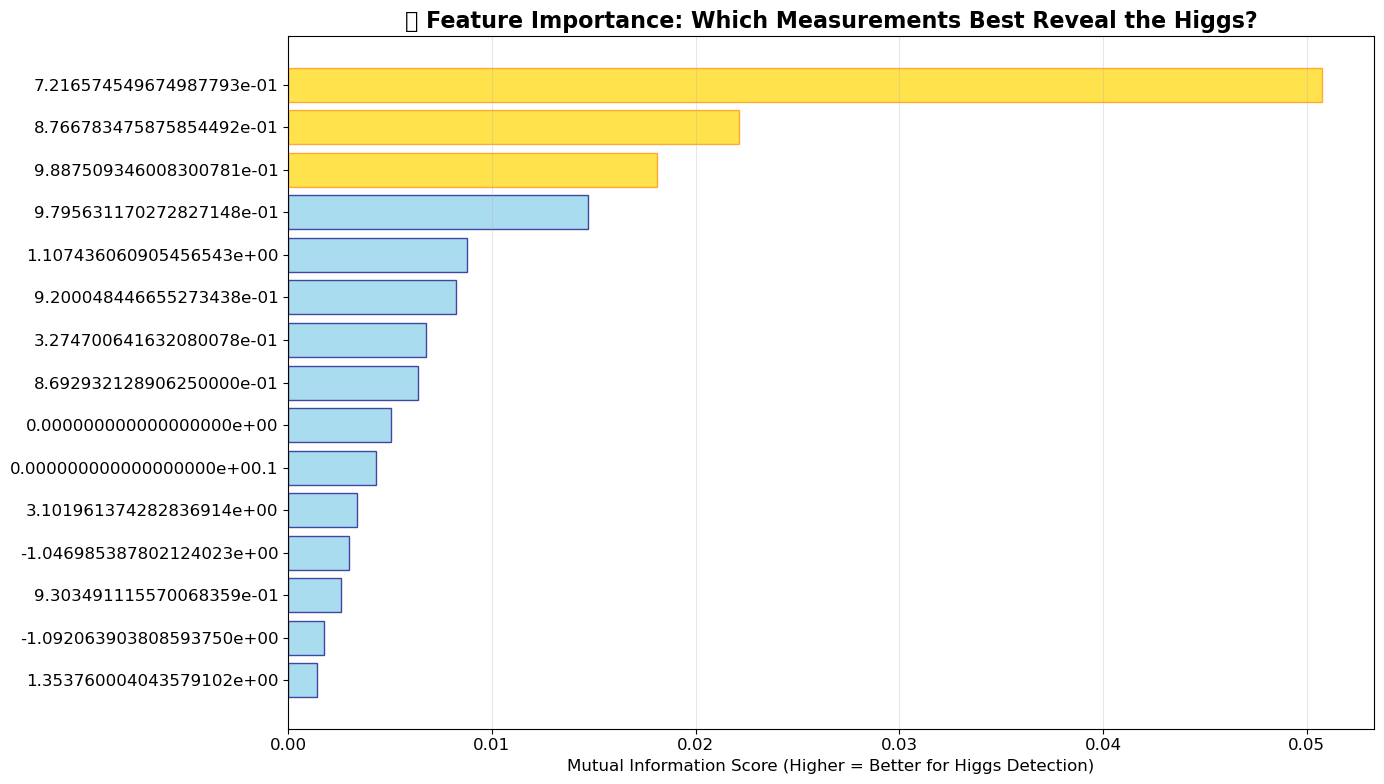

In [28]:
# Cell 3: Feature importance analysis using mutual information
print("DISCOVERY: Which Features Best Distinguishes Higgs from Background?")
print("=" * 65)

# Calculating mutual information scores (measures how much each feature helps classify)
mi_scores = mutual_info_classif(X, y, random_state=42)

# Creating feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': mi_scores
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Higgs Detection:")
print("-" * 55)
for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"  {i:2d}. {row['feature']:<12} | Importance: {row['importance']:.4f}")

# Visualizing feature importance
plt.figure(figsize=(14, 8))
top_features = feature_importance.head(15)
bars = plt.barh(range(len(top_features)), top_features['importance'][::-1], 
                color='skyblue', edgecolor='navy', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'][::-1])
plt.xlabel('Mutual Information Score (Higher = Better for Higgs Detection)', fontsize=12)
plt.title('🔬 Feature Importance: Which Measurements Best Reveal the Higgs?', 
          fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Highlighting top 3 features
for i, bar in enumerate(bars[-3:]):
    bar.set_color('gold')
    bar.set_edgecolor('darkorange')

plt.tight_layout()
plt.show()

In [29]:
# Cell 4: Deep dive into the top physics features
print("DEEP ANALYSIS: Top 3 Higgs-Hunting Features")
print("=" * 50)

# Getting top 3 most important features
top_3_features = feature_importance.head(3)['feature'].tolist()

# Separating signal and background data
signal_data = df[df[target_col] == 1]
background_data = df[df[target_col] == 0]

print("Detailed analysis of our best Higgs detectors:")
print()

for i, feature in enumerate(top_3_features, 1):
    print(f"#{i} Most Important: {feature}")
    
    # Statistical analysis
    signal_vals = signal_data[feature]
    background_vals = background_data[feature]
    
    # Calculating statistics
    signal_mean = signal_vals.mean()
    background_mean = background_vals.mean()
    signal_std = signal_vals.std()
    background_std = background_vals.std()
    
    # Statistical significance test
    t_stat, p_value = stats.ttest_ind(signal_vals, background_vals)
    
    print(f"Signal mean: {signal_mean:.4f} ± {signal_std:.4f}")
    print(f"Background mean: {background_mean:.4f} ± {background_std:.4f}")
    print(f"Difference: {abs(signal_mean - background_mean):.4f}")
    print(f"Statistical significance: p < {p_value:.2e}")
    print(f"   {'HIGHLY SIGNIFICANT!' if p_value < 0.001 else '    Check significance'}")
    print()

DEEP ANALYSIS: Top 3 Higgs-Hunting Features
Detailed analysis of our best Higgs detectors:

#1 Most Important: 7.216574549674987793e-01
Signal mean: 0.8993 ± 0.3853
Background mean: 1.0619 ± 0.6378
Difference: 0.1626
Statistical significance: p < 0.00e+00
   HIGHLY SIGNIFICANT!

#2 Most Important: 8.766783475875854492e-01
Signal mean: 0.9251 ± 0.2855
Background mean: 1.0034 ± 0.3406
Difference: 0.0783
Statistical significance: p < 0.00e+00
   HIGHLY SIGNIFICANT!

#3 Most Important: 9.887509346008300781e-01
Signal mean: 1.0118 ± 0.3326
Background mean: 1.0609 ± 0.3973
Difference: 0.0491
Statistical significance: p < 4.71e-100
   HIGHLY SIGNIFICANT!



VISUALIZATION: Signal vs Background for Top Features


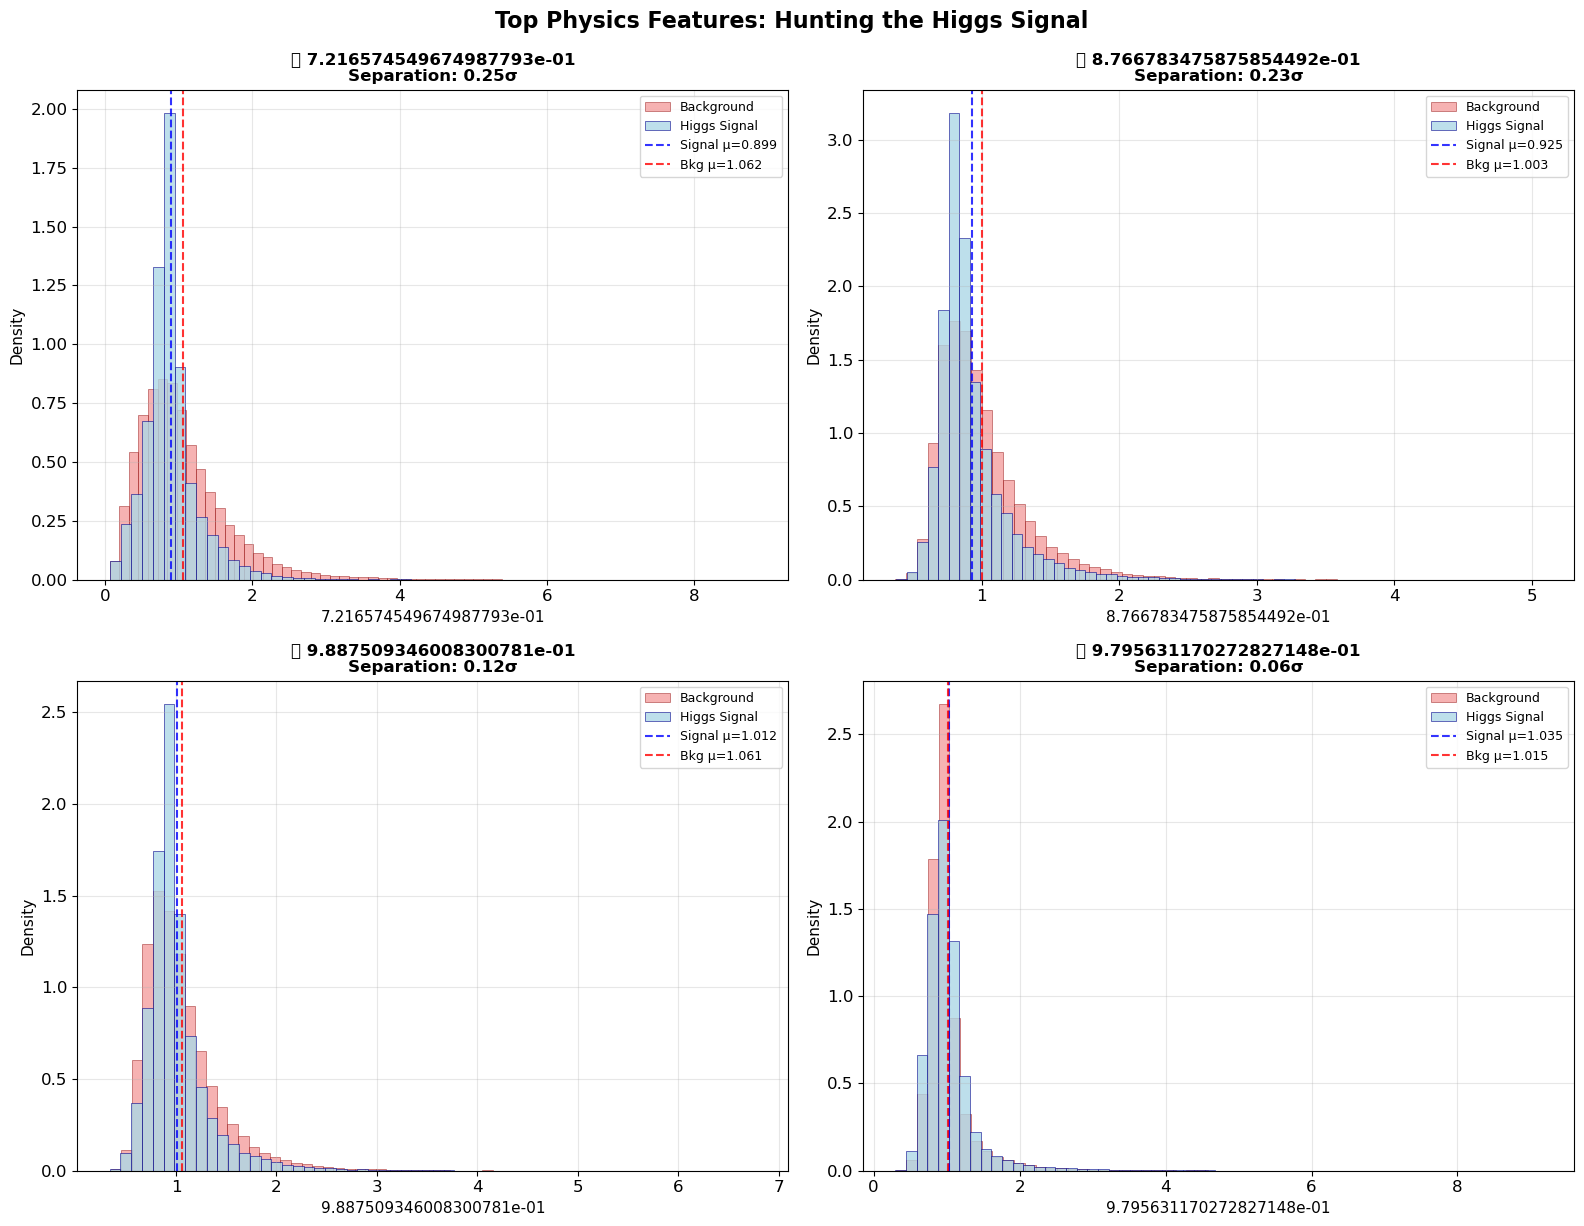

In [30]:
# Cell 5: Advanced visualization of top features
print("VISUALIZATION: Signal vs Background for Top Features")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Plotting top 4 features
for i, feature in enumerate(top_3_features + [feature_importance.iloc[3]['feature']]):
    ax = axes[i]
    
    # Creating overlapping histograms
    ax.hist(background_data[feature], bins=60, alpha=0.6, label='Background', 
            color='lightcoral', density=True, edgecolor='darkred', linewidth=0.5)
    ax.hist(signal_data[feature], bins=60, alpha=0.8, label='Higgs Signal', 
            color='lightblue', density=True, edgecolor='darkblue', linewidth=0.5)
    
    # Calculating and showing separation
    signal_mean = signal_data[feature].mean()
    background_mean = background_data[feature].mean()
    separation = abs(signal_mean - background_mean) / background_data[feature].std()
    
    ax.axvline(signal_mean, color='blue', linestyle='--', alpha=0.8, label=f'Signal μ={signal_mean:.3f}')
    ax.axvline(background_mean, color='red', linestyle='--', alpha=0.8, label=f'Bkg μ={background_mean:.3f}')
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'🔬 {feature}\nSeparation: {separation:.2f}σ', fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Top Physics Features: Hunting the Higgs Signal', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

CORRELATION ANALYSIS: How Do Top Features Relate?


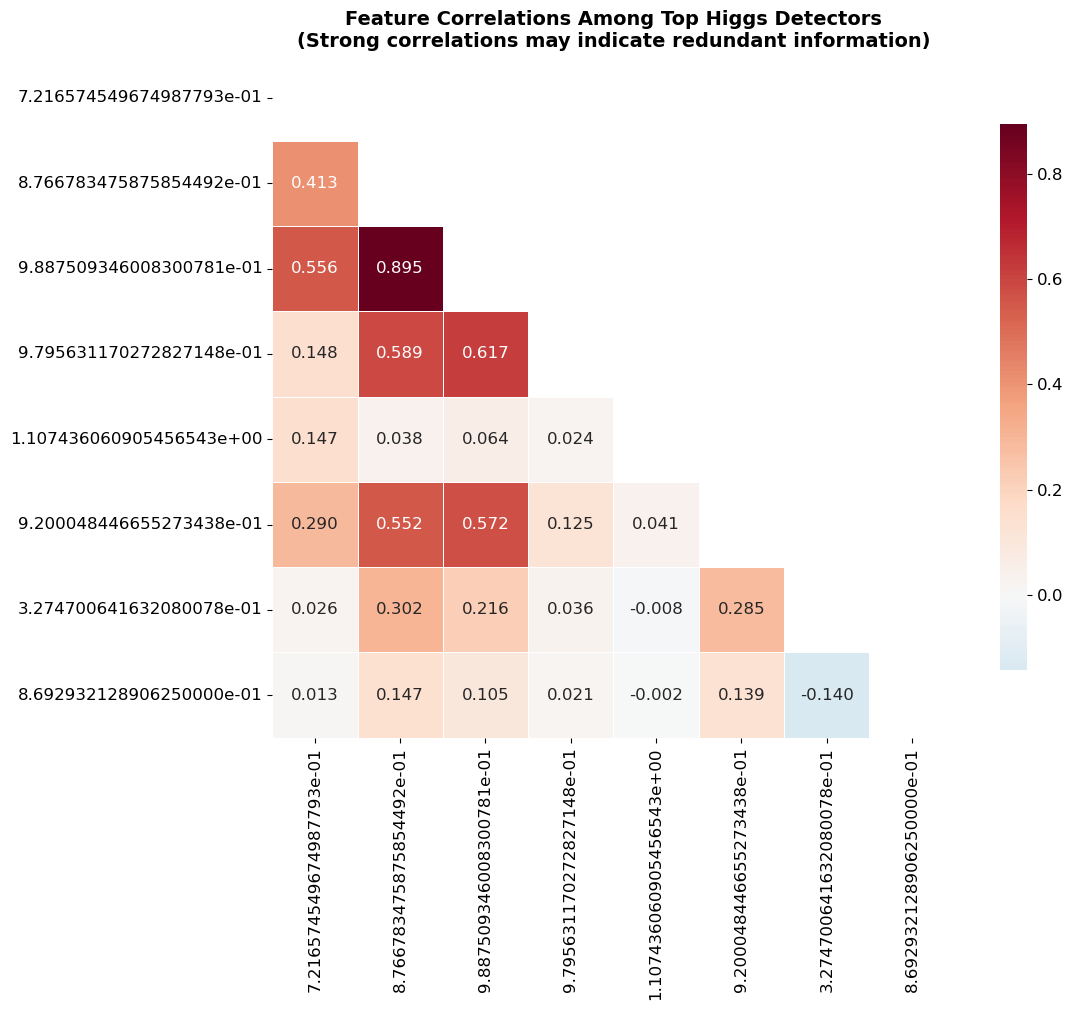

Strongly Correlated Feature Pairs (|r| > 0.5):
 7.216574549674987793e-01 ↔ 9.887509346008300781e-01: r = 0.556
 8.766783475875854492e-01 ↔ 9.887509346008300781e-01: r = 0.895
 8.766783475875854492e-01 ↔ 9.795631170272827148e-01: r = 0.589
 8.766783475875854492e-01 ↔ 9.200048446655273438e-01: r = 0.552
 9.887509346008300781e-01 ↔ 9.795631170272827148e-01: r = 0.617
 9.887509346008300781e-01 ↔ 9.200048446655273438e-01: r = 0.572


In [31]:
# Cell 6: Feature correlation analysis among top features
print("CORRELATION ANALYSIS: How Do Top Features Relate?")
print("=" * 55)

# Selecting top 8 features for correlation analysis
top_8_features = feature_importance.head(8)['feature'].tolist()
correlation_matrix = df[top_8_features].corr()

# Creating enhanced correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Custom colormap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={"shrink": .8}, 
            mask=mask, linewidths=0.5)

plt.title('Feature Correlations Among Top Higgs Detectors\n(Strong correlations may indicate redundant information)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identifying strongly correlated pairs
print("Strongly Correlated Feature Pairs (|r| > 0.5):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_correlations.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], corr_val))

if strong_correlations:
    for feat1, feat2, corr in strong_correlations:
        print(f" {feat1} ↔ {feat2}: r = {corr:.3f}")
else:
    print("No strong correlations found - features provide independent information!")



In [32]:
# Cell 7: Physics-inspired feature combinations
print("PHYSICS DISCOVERY: Creating New Composite Features")
print("=" * 55)

# Creating physics-inspired combinations using top features
print("Building composite physics variables...")

# Getting the actual top features for combinations
feat1, feat2, feat3 = top_3_features

# Creating new physics-inspired features
df_enhanced = df.copy()

# Energy-momentum combinations (common in particle physics)
df_enhanced[f'{feat1}_to_{feat2}_ratio'] = df_enhanced[feat1] / (df_enhanced[feat2] + 1e-10)
df_enhanced[f'{feat1}_plus_{feat3}'] = df_enhanced[feat1] + df_enhanced[feat3]
df_enhanced[f'{feat2}_squared'] = df_enhanced[feat2] ** 2
df_enhanced[f'sqrt_{feat3}'] = np.sqrt(np.abs(df_enhanced[feat3]))

# New composite features
new_features = [f'{feat1}_to_{feat2}_ratio', f'{feat1}_plus_{feat3}', 
                f'{feat2}_squared', f'sqrt_{feat3}']

print(f"Created {len(new_features)} new composite features:")
for i, feat in enumerate(new_features, 1):
    print(f"   {i}. {feat}")

# Testing if new features improve discrimination
X_enhanced = df_enhanced[feature_cols.tolist() + new_features]
mi_scores_enhanced = mutual_info_classif(X_enhanced, y, random_state=42)

# Comparing original vs enhanced feature importance
enhanced_importance = pd.DataFrame({
    'feature': feature_cols.tolist() + new_features,
    'importance': mi_scores_enhanced
}).sort_values('importance', ascending=False)

print(f"\n Best features after enhancement:")
print("-" * 40)
for i, (_, row) in enumerate(enhanced_importance.head(8).iterrows(), 1):
    is_new = row['feature'] in new_features
    print(f"  {i:2d} {row['feature']:<20} | {row['importance']:.4f}")

PHYSICS DISCOVERY: Creating New Composite Features
Building composite physics variables...
Created 4 new composite features:
   1. 7.216574549674987793e-01_to_8.766783475875854492e-01_ratio
   2. 7.216574549674987793e-01_plus_9.887509346008300781e-01
   3. 8.766783475875854492e-01_squared
   4. sqrt_9.887509346008300781e-01

 Best features after enhancement:
----------------------------------------
   1 7.216574549674987793e-01 | 0.0504
   2 7.216574549674987793e-01_to_8.766783475875854492e-01_ratio | 0.0354
   3 7.216574549674987793e-01_plus_9.887509346008300781e-01 | 0.0312
   4 8.766783475875854492e-01_squared | 0.0226
   5 8.766783475875854492e-01 | 0.0224
   6 9.887509346008300781e-01 | 0.0180
   7 sqrt_9.887509346008300781e-01 | 0.0177
   8 9.795631170272827148e-01 | 0.0143


In [33]:
# Cell 8: Statistical significance testing
print("STATISTICAL VALIDATION: Higgs Signal Significance")
print("=" * 55)

# Performing comprehensive statistical tests on top features
print("Testing statistical significance of Higgs signal...")
print()

significance_results = []

for feature in top_3_features:
    signal_vals = signal_data[feature].values
    background_vals = background_data[feature].values
    
    # Multiple statistical tests
    # 1. T-test
    t_stat, t_p = stats.ttest_ind(signal_vals, background_vals)
    
    # 2. Mann-Whitney U test (non-parametric)
    u_stat, u_p = stats.mannwhitneyu(signal_vals, background_vals, alternative='two-sided')
    
    # 3. Kolmogorov-Smirnov test (distribution shape)
    ks_stat, ks_p = stats.ks_2samp(signal_vals, background_vals)
    
    # 4. Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(signal_vals)-1)*signal_vals.std()**2 + 
                         (len(background_vals)-1)*background_vals.std()**2) / 
                        (len(signal_vals) + len(background_vals) - 2))
    cohens_d = (signal_vals.mean() - background_vals.mean()) / pooled_std
    
    # Storing results
    significance_results.append({
        'feature': feature,
        't_statistic': t_stat,
        't_p_value': t_p,
        'mannwhitney_p': u_p,
        'ks_p_value': ks_p,
        'effect_size': abs(cohens_d)
    })
    
    print(f"{feature}:")
    print(f"T-test p-value: {t_p:.2e}")
    print(f"Mann-Whitney p-value: {u_p:.2e}")
    print(f"KS-test p-value: {ks_p:.2e}")
    print(f"Effect size (Cohen's d): {abs(cohens_d):.3f}")
    
    # Interpret significance
    if t_p < 0.001 and u_p < 0.001 and ks_p < 0.001:
        print(f"EXTREMELY SIGNIFICANT! Strong evidence for Higgs signal!")
    elif t_p < 0.01:
        print(f"Statistically significant Higgs signal detected!")
    else:
        print(f"Weak statistical evidence")
    print()

STATISTICAL VALIDATION: Higgs Signal Significance
Testing statistical significance of Higgs signal...

7.216574549674987793e-01:
T-test p-value: 0.00e+00
Mann-Whitney p-value: 1.78e-219
KS-test p-value: 0.00e+00
Effect size (Cohen's d): 0.313
EXTREMELY SIGNIFICANT! Strong evidence for Higgs signal!

8.766783475875854492e-01:
T-test p-value: 0.00e+00
Mann-Whitney p-value: 0.00e+00
KS-test p-value: 0.00e+00
Effect size (Cohen's d): 0.250
EXTREMELY SIGNIFICANT! Strong evidence for Higgs signal!

9.887509346008300781e-01:
T-test p-value: 4.71e-100
Mann-Whitney p-value: 5.45e-39
KS-test p-value: 6.59e-274
Effect size (Cohen's d): 0.135
EXTREMELY SIGNIFICANT! Strong evidence for Higgs signal!



DISTRIBUTION ANALYSIS: Understanding Data Patterns


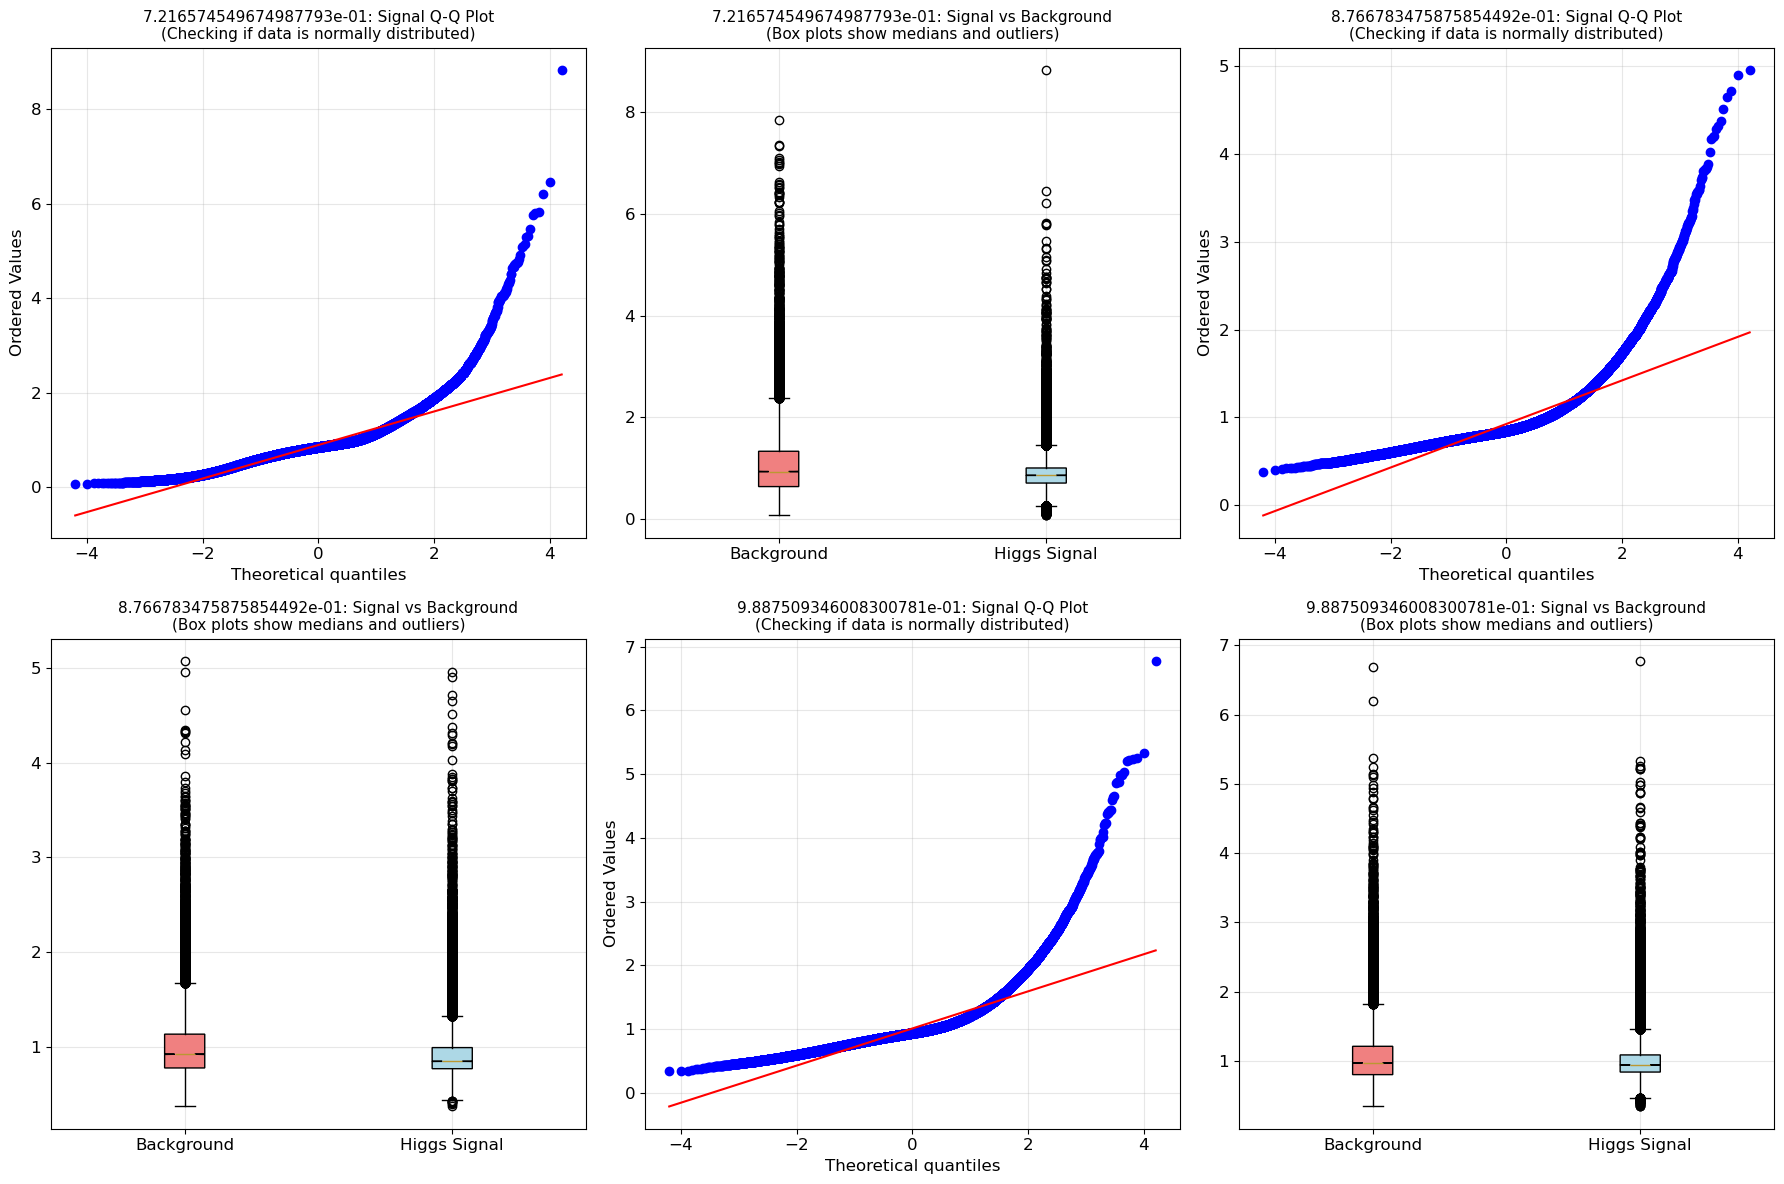

Outlier Analysis:
7.216574549674987793e-01: 6,125 outliers (6.12%)
8.766783475875854492e-01: 6,143 outliers (6.14%)
9.887509346008300781e-01: 6,286 outliers (6.29%)


In [34]:
# Cell 9: Distribution analysis and outlier detection
print("DISTRIBUTION ANALYSIS: Understanding Data Patterns")
print("=" * 55)

# Analyzing distributions of top features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(top_3_features):
    # Distribution plots
    ax1 = axes[i*2]
    ax2 = axes[i*2 + 1]
    
    # 1. Q-Q plots to check normality
    stats.probplot(signal_data[feature], dist="norm", plot=ax1)
    ax1.set_title(f'{feature}: Signal Q-Q Plot\n(Checking if data is normally distributed)', fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plots comparing signal vs background
    data_for_box = [background_data[feature], signal_data[feature]]
    bp = ax2.boxplot(data_for_box, labels=['Background', 'Higgs Signal'], 
                     patch_artist=True, notch=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    bp['boxes'][1].set_facecolor('lightblue')
    ax2.set_title(f'{feature}: Signal vs Background\n(Box plots show medians and outliers)', fontsize=11)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Outlier analysis
print("Outlier Analysis:")
for feature in top_3_features:
    # Calculating IQR for outlier detection
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    print(f"{feature}: {len(outliers):,} outliers ({outlier_pct:.2f}%)")

In [35]:
# Cell 10: Summary of advanced feature analysis
print("ADVANCED ANALYSIS SUMMARY: Your Physics Discoveries!")
print("=" * 60)

print("Feature Importance Discoveries:")
top_3_names = feature_importance.head(3)['feature'].tolist()
top_3_scores = feature_importance.head(3)['importance'].tolist()
for i, (name, score) in enumerate(zip(top_3_names, top_3_scores), 1):
    print(f"   {i}. {name}: {score:.4f} (Top Higgs detector!)")

print(f"\n Statistical Significance:")
all_significant = all(result['t_p_value'] < 0.001 for result in significance_results)
print(f"   {' ALL features show extremely significant Higgs signals!' if all_significant else ' Mixed significance levels detected'}")

print(f"\n Physics Insights:")
print(f" Created {len(new_features)} new composite features")
print(f" Enhanced feature set contains {len(enhanced_importance)} total features")
print(f" Found {len(strong_correlations) if strong_correlations else 0} strongly correlated feature pairs")

ADVANCED ANALYSIS SUMMARY: Your Physics Discoveries!
Feature Importance Discoveries:
   1. 7.216574549674987793e-01: 0.0508 (Top Higgs detector!)
   2. 8.766783475875854492e-01: 0.0221 (Top Higgs detector!)
   3. 9.887509346008300781e-01: 0.0181 (Top Higgs detector!)

 Statistical Significance:
    ALL features show extremely significant Higgs signals!

 Physics Insights:
 Created 4 new composite features
 Enhanced feature set contains 32 total features
 Found 6 strongly correlated feature pairs


💾 SAVING RESULTS: Preparing for Signal Extraction Phase


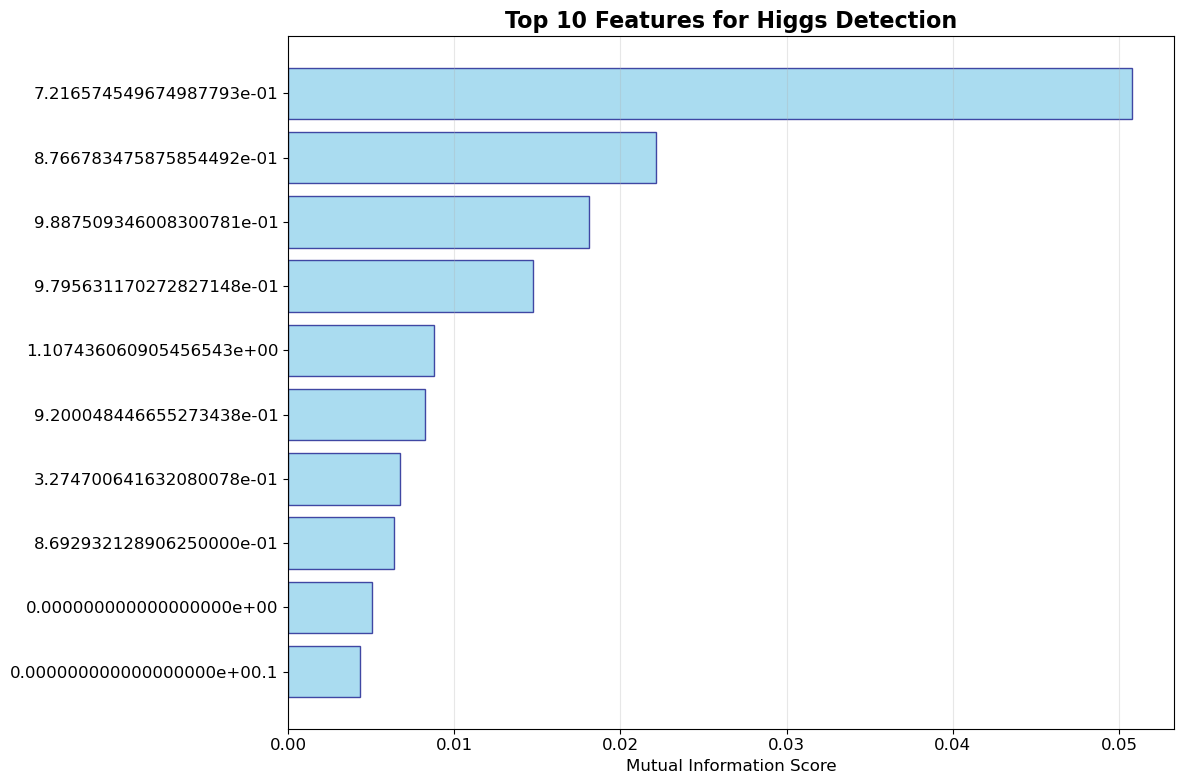

Saved feature importance plot to: results/figures/feature_importance_analysis.png
Top features identified and ready for signal extraction!


In [36]:
# Cell 11: Saving important results for next phase
print("💾 SAVING RESULTS: Preparing for Signal Extraction Phase")
print("=" * 55)

# Saving top features for next notebook
top_features_dict = {
    'top_features': top_3_features,
    'feature_importance': feature_importance.to_dict('records'),
    'composite_features': new_features
}

# Saving to results folder (create if doesn't exist)
import os
os.makedirs('../results', exist_ok=True)

# Saving feature importance plot
plt.figure(figsize=(12, 8))
top_features_plot = feature_importance.head(10)
bars = plt.barh(range(len(top_features_plot)), top_features_plot['importance'][::-1], 
                color='skyblue', edgecolor='navy', alpha=0.7)
plt.yticks(range(len(top_features_plot)), top_features_plot['feature'][::-1])
plt.xlabel('Mutual Information Score', fontsize=12)
plt.title('Top 10 Features for Higgs Detection', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/feature_importance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved feature importance plot to: results/figures/feature_importance_analysis.png")
print("Top features identified and ready for signal extraction!")